In [146]:
import pandas as pd 
import numpy as np
import matplotlib
import seaborn as sns
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn 

In [147]:
pplus = pd.read_csv('ParamedicsPlus5150.csv')

In [148]:
ppluslabels = pplus.columns
ppluslabels

Index(['ID #', 'Date of 5150', 'Age', 'PU City', 'Destination Hospital'], dtype='object')

In [149]:
pplus['primarykey'] = pplus['ID #'].map(str) + pplus['Age']
#creating the primarykey which is the unique identifer for each individual

*Creating the Histogram of Ages of Individuals*

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E9584EEF98>]], dtype=object)

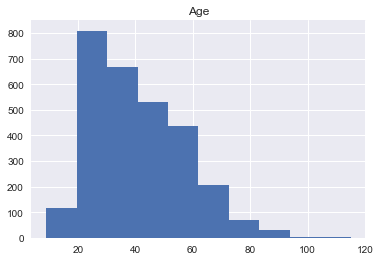

In [150]:
ages = pplus.drop_duplicates('primarykey')
ages = ages.ix[ages['Age'] != '#VALUE!']
ages['Age'] = ages['Age'].astype(int)
ages.hist('Age')


*Separating by Year*

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E9596D54E0>]], dtype=object)

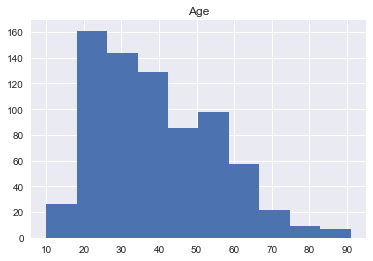

In [151]:
ages['date'] = pd.to_datetime(ages['Date of 5150'])
ages['year'] = ages['date'].dt.year

def hist_ages(year):
    yr = ages[ages['year'] == year]
    return yr.hist('Age')
hist_ages(2015)

*Number of Calls/Year*

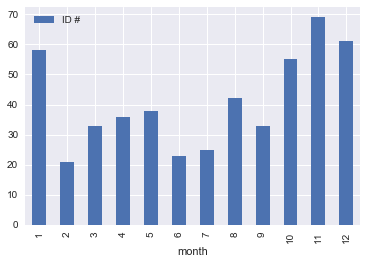

In [152]:
ages['month'] = ages['date'].dt.month
def bar_year(year):
    months = ages[ages['year'] == year].groupby('month').count()
    return months.plot(y='ID #', kind='bar')
bar_year(2012)

*Repeat Individuals*

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E95981D978>]], dtype=object)

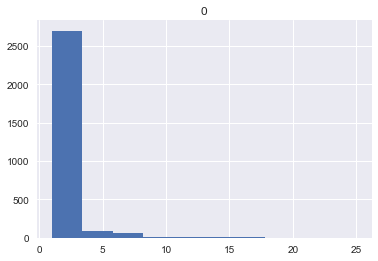

In [153]:
repeats = pd.DataFrame(pplus.groupby('primarykey').size())
repeats.hist()

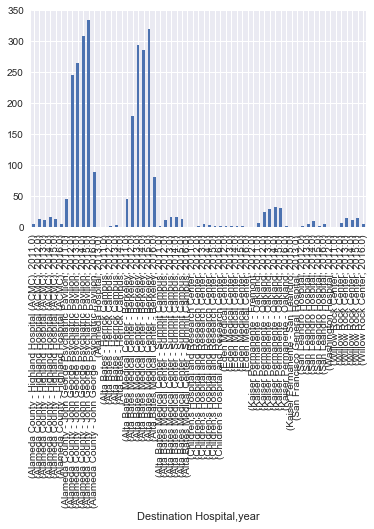

In [155]:
pplus['date'] = pd.to_datetime(pplus['Date of 5150'])
pplus['year'] = ages['date'].dt.year
hospitals_year = pplus.groupby(['Destination Hospital', 'year']).size()
hospitals_year.plot(kind='bar')